# Fundo de Investimento

## Coletando e organizando os dados

In [ ]:
!pip install wget
!pip install pandas
!pip install pandas datareader
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install keras
!pip install -q yfinance
!pip install data
!pip install pandas_datareader

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 MB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 45.0 MB/s eta 0:00:00
  Created wheel for datareader: filename=datareader-0.0.9-py3-none-any.whl size=62321261 sha256=44746fea9bb7c725ff149de20a3c82db70b6d7a2ec8c2375002a884428eb0ab7
  Stored in directory: /root/.cache/pip/wheels/f4/21/25/ef550bed00e29e6b194a05755bf982142e0816613536c3ecd3
Successfully built datareader
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.

In [ ]:
import pandas as pd
import wget
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import tensorflow as tf
import keras
import data
import time
import datetime
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas_datareader.data as web
import shutil
import os

2023-08-26 03:28:30.103128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 03:28:30.226819: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-26 03:28:30.226858: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-26 03:28:30.245373: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-26 03:28:31.583315: W tensorflow/stream_executor/platform/de

In [ ]:
from zipfile import ZipFile
from pandas.tseries.offsets import BDay
from datetime import date
from scipy.stats import zscore
from pathlib import Path
from pandas.tseries.offsets import BDay
pd.set_option("display.max_colwidth", 150)

In [ ]:
url_fi_hist = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/HIST/'

url_fi_dados = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/'

arquivos_zip = []
for ano in range(2023, 2024):
    for mes in range(1, 13):
        arquivos_zip.append('inf_diario_fi_{}{:02}.zip'.format(ano, mes))
        
print(arquivos_zip)

import shutil
shutil.rmtree('/work/Deepnote/CVM/FI/ZIP')
shutil.rmtree('/work/Deepnote/CVM/FI/CSV')
shutil.rmtree('/work/Deepnote/CVM/FI/CONCAT')
shutil.rmtree('/work/Deepnote/CVM/FI/REPORT')

import os
os.mkdir('/work/Deepnote/CVM/FI/ZIP')
os.mkdir('/work/Deepnote/CVM/FI/CSV')
os.mkdir('/work/Deepnote/CVM/FI/CONCAT')
os.mkdir('/work/Deepnote/CVM/FI/REPORT')

import wget
for arq in arquivos_zip:
  try:
    wget.download(url_fi_dados+arq, out='/work/Deepnote/CVM/FI/ZIP')
  except Exception as e:
    print('Erro ref. meses não processados: ', e)

['inf_diario_fi_202301.zip', 'inf_diario_fi_202302.zip', 'inf_diario_fi_202303.zip', 'inf_diario_fi_202304.zip', 'inf_diario_fi_202305.zip', 'inf_diario_fi_202306.zip', 'inf_diario_fi_202307.zip', 'inf_diario_fi_202308.zip', 'inf_diario_fi_202309.zip', 'inf_diario_fi_202310.zip', 'inf_diario_fi_202311.zip', 'inf_diario_fi_202312.zip']
Erro ref. meses não processados:  <urlopen error [Errno -5] No address associated with hostname>
Erro ref. meses não processados:  HTTP Error 404: Not Found
Erro ref. meses não processados:  HTTP Error 404: Not Found
Erro ref. meses não processados:  HTTP Error 404: Not Found
Erro ref. meses não processados:  HTTP Error 404: Not Found


In [ ]:
from zipfile import ZipFile
import glob

zip_files = glob.glob('/work/Deepnote/CVM/FI/ZIP/*.zip')

for zip_file in zip_files:
    with ZipFile(zip_file, 'r') as zf:
        zf.extractall('/work/Deepnote/CVM/FI/CSV')

In [ ]:
import pandas as pd
import os

arquivo = pd.DataFrame()
for ano in range(2023, 2024):
    for mes in range(1, 13):
        filename = f'/work/Deepnote/CVM/FI/CSV/inf_diario_fi_{ano}{mes:02}.csv'
        if os.path.exists(filename):
            arquivo = pd.concat([arquivo, pd.read_csv(filename, sep=';', decimal=',', encoding='ISO-8859-1')])
arquivo.to_csv(f'/work/Deepnote/CVM/FI/CONCAT/inf_diario_fi_{ano:04}', index=False)

## Fundos de Investimentos

In [ ]:
fi_dados = pd.read_csv('/work/Deepnote/CVM/FI/CONCAT/inf_diario_fi_2023')
fi_dados

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2023-01-02,1101835.91,30.974427,1104834.84,0.0,0.0,1
1,FI,00.017.024/0001-53,2023-01-03,1102410.18,30.988913,1105351.56,0.0,0.0,1
2,FI,00.017.024/0001-53,2023-01-04,1102994.24,31.003303,1105864.82,0.0,0.0,1
3,FI,00.017.024/0001-53,2023-01-05,1103561.75,31.017294,1106363.87,0.0,0.0,1
4,FI,00.017.024/0001-53,2023-01-06,1103794.86,31.030820,1106846.36,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
3582479,FI,97.929.213/0001-34,2023-08-17,84181706.66,11.077665,84182737.50,0.0,0.0,2
3582480,FI,97.929.213/0001-34,2023-08-18,84234812.77,11.084581,84235293.42,0.0,0.0,2
3582481,FI,97.929.213/0001-34,2023-08-21,84156165.21,11.074240,84156707.32,0.0,0.0,2
3582482,FI,97.929.213/0001-34,2023-08-22,84260104.66,11.087843,84260080.61,0.0,0.0,2


### Função de definição dos melhores e piores fundos

In [ ]:
def melhores_e_piores(informes, cadastro, top=5, minimo_de_cotistas=100, classe=''):  
  cadastro      = cadastro[cadastro['SIT'] == 'EM FUNCIONAMENTO NORMAL']
  fundos        = informes[informes['NR_COTST'] >= minimo_de_cotistas]
  cnpj_informes = fundos['CNPJ_FUNDO'].drop_duplicates()
  
  fundos = fundos.pivot(index='DT_COMPTC', columns='CNPJ_FUNDO')  
  cotas_normalizadas = fundos['VL_QUOTA'] / fundos['VL_QUOTA'].iloc[0]
  
  if classe == 'multimercado':
    cnpj_cadastro      = cadastro[cadastro['CLASSE'] == 'Fundo Multimercado']['CNPJ_FUNDO']   
    cotas_normalizadas = cotas_normalizadas[cnpj_cadastro[cnpj_cadastro.isin(cnpj_informes)]]

  if classe == 'acoes':
    cnpj_cadastro      = cadastro[cadastro['CLASSE'] == 'Fundo de Ações']['CNPJ_FUNDO']   
    cotas_normalizadas = cotas_normalizadas[cnpj_cadastro[cnpj_cadastro.isin(cnpj_informes)]]

  if classe == 'rendafixa':
    cnpj_cadastro      = cadastro[cadastro['CLASSE'] == 'Fundo de Renda Fixa']['CNPJ_FUNDO']   
    cotas_normalizadas = cotas_normalizadas[cnpj_cadastro[cnpj_cadastro.isin(cnpj_informes)]]

  if classe == 'cambial':
    cnpj_cadastro      = cadastro[cadastro['CLASSE'] == 'Fundo Cambial']['CNPJ_FUNDO']   
    cotas_normalizadas = cotas_normalizadas[cnpj_cadastro[cnpj_cadastro.isin(cnpj_informes)]]
  
  #melhores
  melhores = pd.DataFrame()
  melhores['retorno(%)'] = (cotas_normalizadas.iloc[-1].sort_values(ascending=False)[:top] - 1) * 100
  for cnpj in melhores.index:
    fundo = cadastro[cadastro['CNPJ_FUNDO'] == cnpj]
    melhores.at[cnpj, 'Fundo de Investimento'] = fundo['DENOM_SOCIAL'].values[0]
    melhores.at[cnpj, 'Classe']                = fundo['CLASSE'].values[0]
    melhores.at[cnpj, 'PL']                    = fundo['VL_PATRIM_LIQ'].values[0]

  #piores
  piores = pd.DataFrame()
  piores['retorno(%)'] = (cotas_normalizadas.iloc[-1].sort_values(ascending=True)[:top] - 1) * 100
  for cnpj in piores.index:
    fundo = cadastro[cadastro['CNPJ_FUNDO'] == cnpj]
    piores.at[cnpj, 'Fundo de Investimento'] = fundo['DENOM_SOCIAL'].values[0]
    piores.at[cnpj, 'Classe']                = fundo['CLASSE'].values[0]
    piores.at[cnpj, 'PL']                    = fundo['VL_PATRIM_LIQ'].values[0]
  
  return melhores, piores


  def consulta_fundo(informes, cnpj):  
    fundo = informes[informes['CNPJ_FUNDO'] == cnpj].copy()
    fundo.set_index('DT_COMPTC', inplace=True)
    fundo['cotas_normalizadas'] = (fundo['VL_QUOTA'] / fundo['VL_QUOTA'].iloc[0])*100
  return fundo

### Banco Central - CDI

In [ ]:
def cdi_acumulado(data_inicio, data_fim):
  codigo_bcb = 12
  
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  cdi = pd.read_json(url)
  cdi['data'] = pd.to_datetime(cdi['data'], dayfirst=True)
  cdi.set_index('data', inplace=True) 
  
  cdi_acumulado = (1 + cdi[data_inicio : data_fim] / 100).cumprod()
  cdi_acumulado.iloc[0] = 1
  return cdi_acumulado

cdi = cdi_acumulado('2023-01-01', '2023-08-31') * 100
cdi


,valor
data,
2023-01-02,100.000000
2023-01-03,100.101602
2023-01-04,100.152441
2023-01-05,100.203307
2023-01-06,100.254198
...,...
2023-08-18,108.385313
2023-08-21,108.438462
2023-08-22,108.491637


### Indice Ibovespa - Yahoo

In [ ]:
ibov = yf.download('^BVSP', start='2023-01-02', end='2023-08-31')['Adj Close']
ibov = (ibov / ibov.iloc[0])*100

[*********************100%%**********************]  1 of 1 completed


Date
2023-01-02    100.000000
2023-01-03     97.922464
2023-01-04     99.020456
2023-01-05    101.073550
2023-01-06    102.312552
                 ...    
2023-08-21    107.570317
2023-08-22    109.193803
2023-08-23    111.054185
2023-08-24    110.011657
2023-08-25    108.893923
Name: Adj Close, Length: 164, dtype: float64

### Buscando Dados da CVM

In [ ]:
def busca_cadastro_cvm(data=(date.today()-BDay(1))):
  if data is not busca_cadastro_cvm.__defaults__[0]:
    data = pd.to_datetime(data)
  
  try:
    url = 'http://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv'
    return pd.read_csv(url, sep=';', encoding='ISO-8859-1')

  except: 
    print("Arquivo {} não encontrado!".format(url))
    print("Forneça outra data!")

cadastro = busca_cadastro_cvm()    

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3318: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


## Melhores e Piores fundos investimento

### Melhores

In [ ]:
melhores, piores = melhores_e_piores(fi_dados, cadastro, top=10, minimo_de_cotistas=100, classe='acoes')
melhores

,retorno(%),Fundo de Investimento,Classe,PL
CNPJ_FUNDO,,,,
35.625.840/0001-24,92.120499,TREND XP INC FI EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES BDR NÍVEL I,Fundo de Ações,7.648426e+07
35.650.540/0001-03,91.956922,TREND XP INC DOMINUS FI EM COTAS DE FI EM AÇÕES BDR NÍVEL I,Fundo de Ações,2.051173e+07
11.060.594/0001-42,67.508341,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS PRÉ-SAL,Fundo de Ações,8.349469e+07
08.336.054/0001-34,67.505467,SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS,Fundo de Ações,1.142796e+08
11.419.612/0001-30,67.189284,ITAÚ AÇÕES PETROBRÁS II FUNDO DE INVESTIMENTO,Fundo de Ações,4.394393e+06
11.504.894/0001-73,66.321087,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES - PETROBRAS 2010,Fundo de Ações,1.220037e+07
36.249.317/0001-03,62.339161,ITAÚ INDEX US TECH FICFI EM AÇÕES INVESTIMENTO NO EXTERIOR,Fundo de Ações,3.693187e+08
29.152.427/0001-97,62.061775,ITAÚ US TECH FUNDO DE INVEST EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES INVESTIMENTO NO EXTERIOR,Fundo de Ações,8.338182e+07
34.218.752/0001-45,61.788229,EMPIRICUS EXPONENCIAL FUNDO DE INVESTIMENTO EM AÇÕES INVESTIMENTO NO EXTERIOR,Fundo de Ações,2.504555e+07


### Piores

In [ ]:
piores

,retorno(%),Fundo de Investimento,Classe,PL
CNPJ_FUNDO,,,,
34.218.661/0001-00,-38.353623,VITREO CANABIDIOL FUNDO DE INVESTIMENTO EM AÇÕES INVESTIMENTO NO EXTERIOR,Fundo de Ações,1.718890e+07
07.470.234/0001-41,-26.997593,SAFRA VALE DO RIO DOCE - FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES,Fundo de Ações,3.959720e+07
04.881.177/0001-03,-26.982206,ITAÚ AÇÕES VALE - FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO,Fundo de Ações,2.945364e+08
09.296.352/0001-00,-26.754739,SANTANDER FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO VALE PLUS AÇÕES,Fundo de Ações,2.152041e+07
09.130.395/0001-11,-26.752016,SANTANDER FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO VALE 3 AÇÕES,Fundo de Ações,1.909530e+07
04.895.210/0001-46,-26.680997,SANTANDER VALE AÇÕES FI,Fundo de Ações,6.354609e+07
04.885.820/0001-69,-26.582288,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA VALE DO RIO DOCE,Fundo de Ações,6.432373e+08
04.881.682/0001-40,-26.493631,BB AÇÕES VALE FUNDO DE INVESTIMENTO,Fundo de Ações,6.973362e+08
04.889.781/0001-78,-26.470162,SANTANDER FI VALE 4 AÇÕES,Fundo de Ações,1.210287e+08


## Gráficos

In [ ]:
cotas = pd.DataFrame()
fundos_destaque = pd.concat([melhores, piores])

for cnpj in fundos_destaque.index:
  cotas = pd.concat([cotas, consulta_fundo(fi_dados, cnpj)['cotas_normalizadas']], axis=1)

cotas.columns = fundos_destaque['Fundo de Investimento']

In [ ]:
fig = go.Figure()

traces = [go.Scatter(
    x = cotas.index,
    y = cotas[fundo],
    name = fundo
) for fundo in cotas.columns]

fig.add_trace(go.Scatter(x=ibov.index, y=ibov, name='IBOV', line=dict(color='black', width=3)))

fig.add_traces(traces)
fig.update_layout(title='Melhores e Piores Fundos de Ações')
fig.update_layout(legend_orientation="h")

fig.show()

## Fundos Multimercado - Melhores e Piores

### Melhores

In [ ]:
melhores, piores = melhores_e_piores(fi_dados, cadastro, top=5, minimo_de_cotistas=100, classe='multimercado')
melhores

,retorno(%),Fundo de Investimento,Classe,PL
CNPJ_FUNDO,,,,
39.800.501/0001-98,65.567315,BDR AVARGA FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,13782168.75
30.887.013/0001-95,58.008074,VERSA TRACKER FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,25313872.93
30.338.659/0001-13,54.709925,CHESS ALPHA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,21071938.81
40.212.883/0001-18,45.017756,TREND NASDAQ 100 FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,9888009.11
42.776.707/0001-34,43.622424,TREND SEMICONDUTORES FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,6496040.85


### Piores

In [ ]:
piores

,retorno(%),Fundo de Investimento,Classe,PL
CNPJ_FUNDO,,,,
23.799.268/0001-30,-48.700174,ESH THETA 18 FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,1.050590e+08
35.580.122/0001-89,-41.785021,CSHG INTERNATIONAL PROPERTIES FUNDO DE INVESTIMENTO MULTIMERCADO - CRÉD PRIV IE,Fundo Multimercado,5.483110e+07
34.218.748/0001-87,-39.115346,VITREO CANNABIS ATIVO FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,5.243491e+06
29.461.997/0001-69,-33.902024,BLP PJC VII - FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO,Fundo Multimercado,4.664216e+07
38.948.698/0001-44,-33.449657,G5 SPECIAL F SUB FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO INVESTIMENTO NO EXTERIOR,Fundo Multimercado,8.615746e+07


### Grafico de cotas

In [ ]:
cotas = pd.DataFrame()
fundos_destaque = pd.concat([melhores, piores])

for cnpj in fundos_destaque.index:
  cotas = pd.concat([cotas, consulta_fundo(fi_dados, cnpj)['cotas_normalizadas']], axis=1)

cotas.columns = fundos_destaque['Fundo de Investimento']

cotas

Fundo de Investimento,BDR AVARGA FUNDO DE INVESTIMENTO MULTIMERCADO,VERSA TRACKER FUNDO DE INVESTIMENTO MULTIMERCADO,CHESS ALPHA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,TREND NASDAQ 100 FUNDO DE INVESTIMENTO MULTIMERCADO,TREND SEMICONDUTORES FUNDO DE INVESTIMENTO MULTIMERCADO,ESH THETA 18 FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO,CSHG INTERNATIONAL PROPERTIES FUNDO DE INVESTIMENTO MULTIMERCADO - CRÉD PRIV IE,VITREO CANNABIS ATIVO FUNDO DE INVESTIMENTO MULTIMERCADO,BLP PJC VII - FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO,G5 SPECIAL F SUB FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO INVESTIMENTO NO EXTERIOR
2023-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2023-01-03,95.747452,94.092580,91.384303,100.136971,98.929697,120.890249,101.517136,99.831562,99.993513,99.736156
2023-01-04,92.109498,92.508591,93.881724,100.022062,101.335036,120.173782,101.660029,105.943586,99.980447,99.780676
2023-01-05,98.108659,97.438526,100.386929,98.641021,99.569977,146.190145,100.078294,104.459682,99.989403,99.920799
2023-01-06,99.824442,101.872425,107.800196,101.077028,104.171178,128.020139,97.905268,102.030517,100.002842,100.117098
...,...,...,...,...,...,...,...,...,...,...
2023-08-17,158.365852,153.059325,138.976904,140.356778,137.031029,51.843030,59.667142,62.006926,69.243788,66.336692
2023-08-18,160.397989,154.409862,141.687969,140.299350,137.440744,51.929435,59.443783,61.917892,69.236739,66.334060
2023-08-21,155.698574,148.839026,137.800700,142.666588,141.507486,53.088932,59.563956,62.169670,69.222744,66.313872
2023-08-22,157.381721,153.028544,145.892597,142.621218,140.189134,51.759065,59.015992,61.303437,66.097406,66.277641


In [ ]:
fig = go.Figure()

traces = [go.Scatter(
    x = cotas.index,
    y = cotas[fundo],
    name = fundo
) for fundo in cotas.columns]

fig.add_trace(go.Scatter(x=ibov.index, y=ibov, name='IBOV', line=dict(color='black', width=3, dash='dot')))
fig.add_trace(go.Scatter(x=cdi.index, y=cdi['valor'], name='CDI', line=dict(color='blue', width=3)))

fig.add_traces(traces)
fig.update_layout(
    title='Melhores e Piores Fundos Multimercado', 
    legend_orientation="h",
    autosize=True,   
    height=700,

    )

fig.show()

### Correlação

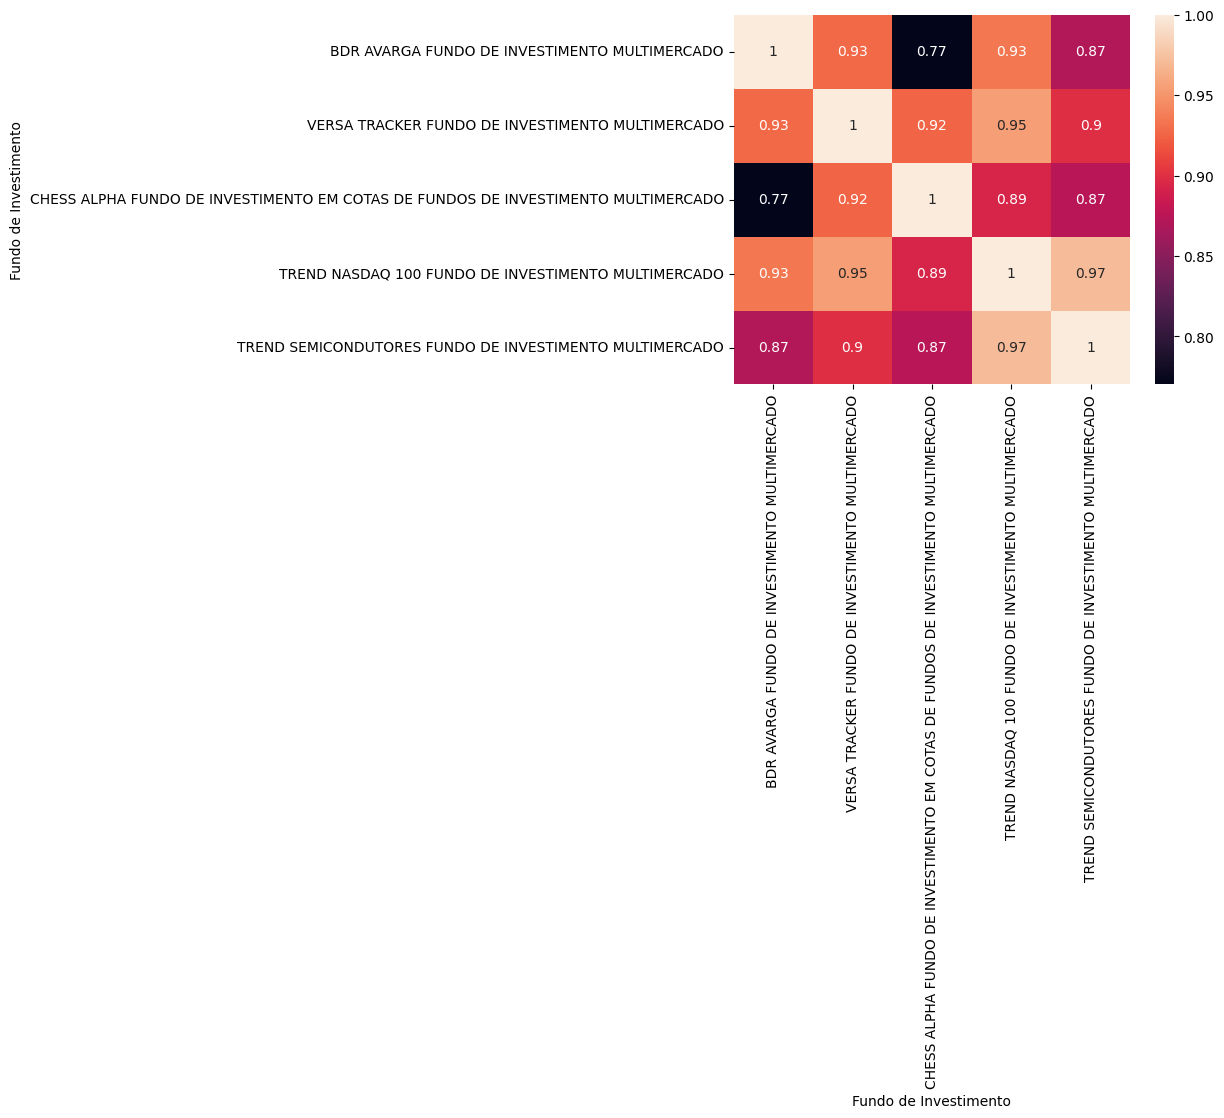

In [ ]:
sns.heatmap(cotas.iloc[:, :5].corr(), annot=True);

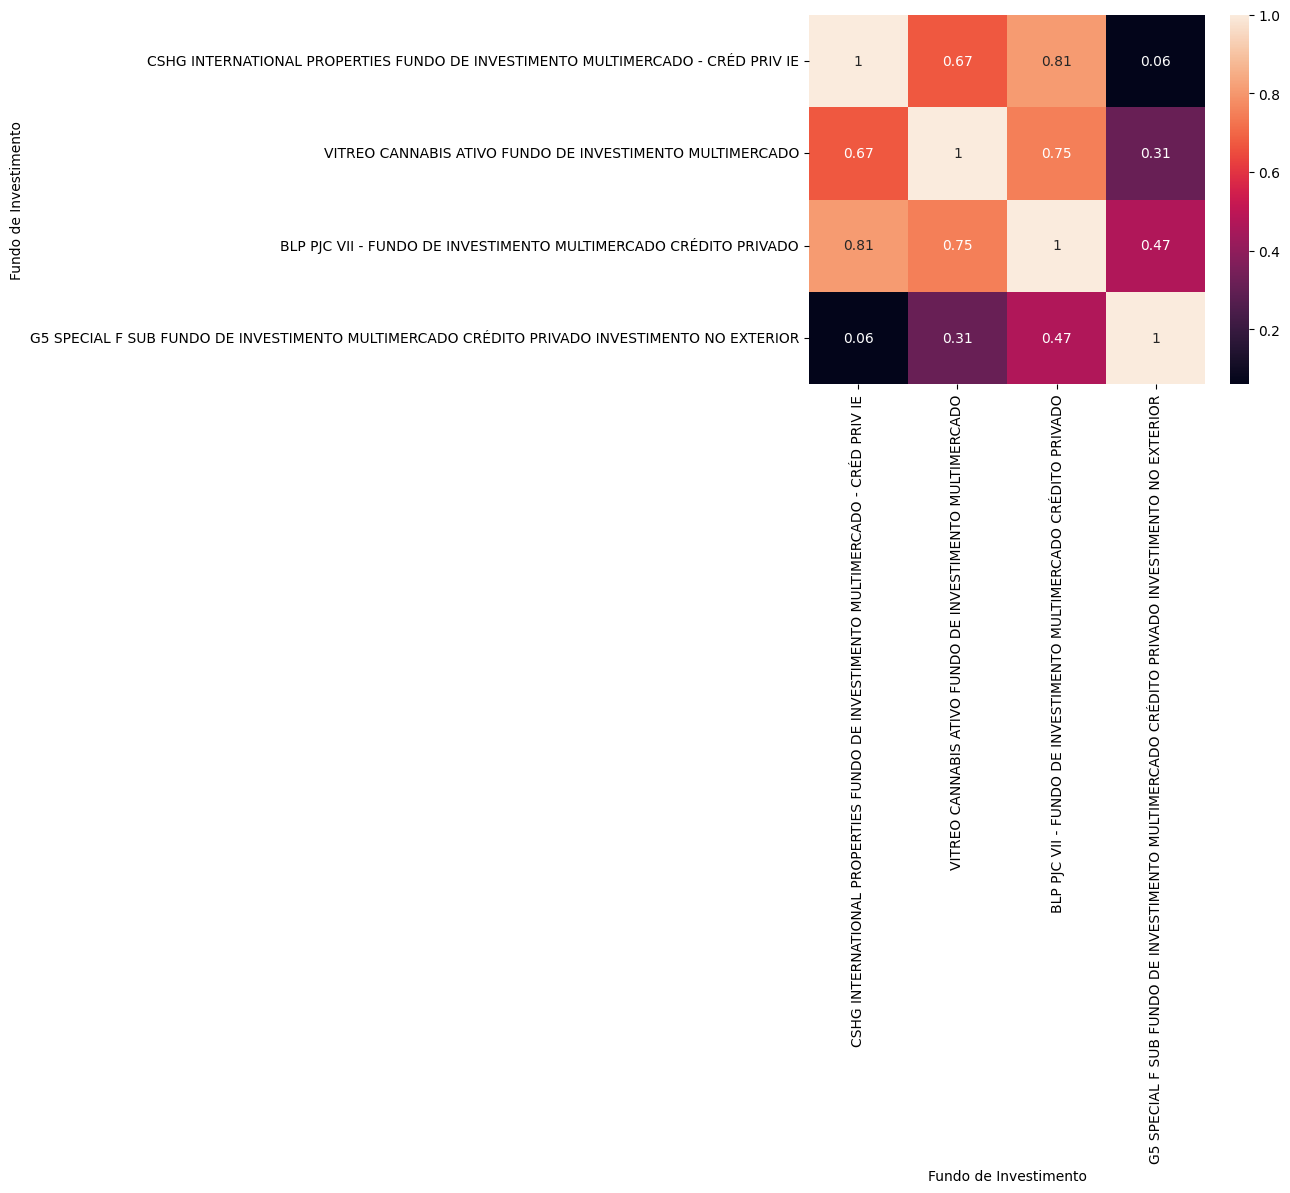

In [ ]:
sns.heatmap(cotas.iloc[:, 6:].corr(), annot=True);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6078c45f-88a0-48c4-be12-78672baeec66' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>